Importando as bibliotecas


In [8]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from numpy.core.defchararray import join


Função K-means


In [9]:
def my_centers(samples, number_centers):
    """
    It uses the Forgy method
    """
    centers = []
    for i in range(number_centers):
        centers.append(samples[i])
    return centers


def distance(sample, center):
    diff = sample - center
    dist = np.linalg.norm(diff)
    return dist


def find_minimal_distance(point, centers):
    min_pos = 0
    min_dist = distance(point, centers[0])
    
    for i in range(1, len(centers)):
        new_dist = distance(point, centers[i])
        if new_dist < min_dist:
            min_dist = new_dist
            min_pos = i
    return min_pos, min_dist


def my_kmeans(arrays, number_centers, max_iteration : int = 1000):
    # adquire os centros dos clusters
    centers = my_centers(arrays, number_centers)
    # inicia a separacao dos pontos em clusters
    samples = len(arrays)
    over = False
    iterations = 0
    while not over:
        iterations += 1
        cluster_sum = [0] * number_centers
        cluster_number_points = np.zeros(number_centers)
        
        # encontra a distancia minima e soma a distancia no respectivo cluster
        for i in range(samples):
            min = find_minimal_distance(arrays[i], centers)
            cluster_sum[min[0]] += arrays[i]
            cluster_number_points[min[0]] += 1
        
        # calcula a media de cada cluster e modifica os centros
        prev_center = centers
        for i in range(number_centers):
            centers[i] = cluster_sum[i] / cluster_number_points[i]
        
        # verifica se os centros foram alterados, senao encerra o algoritmo
        for i in range(number_centers):
            if (centers[i] == prev_center[i]).all:
                over = True
                break
            if iterations > max_iteration:
                over = True
                break
    return centers


Recebendo os dados do dataset


In [10]:
def recebe_dataset(string):
    arquivo = pd.read_csv(string, header=0)
    linhas = len(arquivo)
    colunas = len(arquivo.columns)
    array_linha = np.zeros(colunas)
    array_final = np.array([array_linha] * linhas)
    j = 0
    i = 0

    while i < linhas:
        array_linha[j] = arquivo.iloc[i, j]
        j += 1
        if j == 7:
            array_final[i] = array_linha
            j = 0
            i += 1

    return array_final


Calculo elbow


In [11]:
def my_k_elbow(amostra, centros):

    # inicio alguns arrays e valores que fazeri o uso durante a execução

    tamanho_array_distancias = len(amostra)
    tamanho_array_intermediario = 2
    array_distancias = np.zeros(tamanho_array_distancias)
    array_intermediario = np.zeros(tamanho_array_intermediario)
    array_valores_finais = np.zeros(centros - 2)

    y = np.zeros([centros - 2])
    i = k = h = 0
    n = 2

    # laço de repetição de n centros
    while n < centros:
        centroides = np.array(my_kmeans(amostra, n))
        
        # laço de repetição para a menor distancia com amostras e centroides
        while i < len(amostra):
            array_intermediario = find_minimal_distance(amostra[i], centroides)
            array_distancias[i] = array_intermediario[1]
            i += 1

        # assim que o array que contem as distancias fica cheio, ele sera calculado e
        # adicionado ao array final, o array final é utilizado para plotar o grafico

        # é percorrido cada elemento e elevado ao quadrado
        i = 0
        while i < len(array_distancias):
            array_distancias[i] = array_distancias[i] * array_distancias[i]
            i += 1
        
        i = 0
        # depois, é somado
        array_valores_finais[k] = array_distancias.sum()
        k += 1
        n += 1
        # cria um array apartir com a quantidade de centros

        while h < centros - 2:
            y[h] = h
            h += 1

    # print(array_valores_finais)

    # plota o grafico final
    plt.title("Gráfico com os resultados finais")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(y, array_valores_finais)
    plt.show()


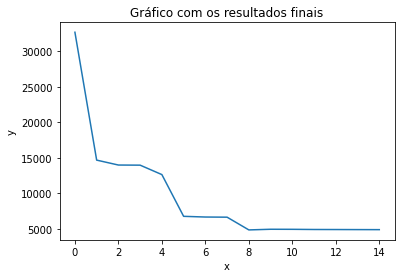

In [12]:
# executando o programa
nome = "https://raw.githubusercontent.com/G-Nozawa/K-Means-Elbow-method/main/dados/dados_parte_1.csv"
array_final = recebe_dataset(nome)
# print(array_final)
my_k_elbow(array_final, 17)